In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [3]:
# !head adult.data

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [4]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [5]:
df = pd.read_csv("adult.data", sep=",", names=cols)


# Сколько мужчин и женщин?

In [6]:
num_of_male_female = df["sex"].value_counts()
num_of_male_female

 Male      21790
 Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [29]:
average_age = df.groupby("sex")["age"].mean()
average_age

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [8]:
part_of_USA = df["native-country"].value_counts()[0] / df["native-country"].count()
part_of_USA

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0,0.5,'num')

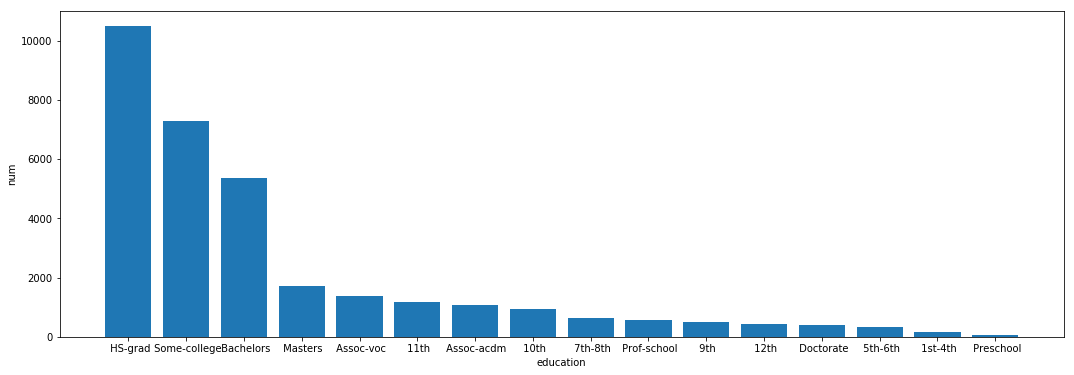

In [9]:
x = list(df["education"].value_counts().keys())
y = list(df["education"].value_counts())
plt.figure(figsize=(18, 6))
plt.bar(x, y)
plt.xlabel("education")
plt.ylabel("num")

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [32]:
average_fnlwgt = df.loc[df["marital-status"] == " Divorced", ["fnlwgt"]].mean()
std_fnlwgt = df.loc[df["marital-status"] == " Divorced", ["fnlwgt"]].std()
print("mean fnlwgt")
print(average_fnlwgt)
print("std fnlwgt")
print(std_fnlwgt)

mean fnlwgt
fnlwgt    185802.790457
dtype: float64
std fnlwgt
fnlwgt    105646.789459
dtype: float64


(0, 700000)

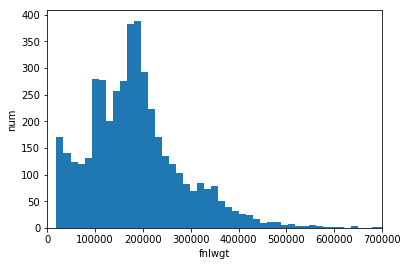

In [28]:
x = list(df["fnlwgt"].loc[df["marital-status"] == " Divorced"].keys())
y = list(df["fnlwgt"].loc[df["marital-status"] == " Divorced"])
plt.hist(df["fnlwgt"].loc[df["marital-status"] == " Divorced"], bins=100)
plt.xlabel("fnlwgt")
plt.ylabel("num")
plt.xlim(0,700000)

> Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [12]:
salary_values = df.loc[df["result"] == " >50K"]["education"].value_counts(normalize=True)
salary_values

 Bachelors       0.283255
 HS-grad         0.213621
 Some-college    0.176891
 Masters         0.122306
 Prof-school     0.053947
 Assoc-voc       0.046040
 Doctorate       0.039026
 Assoc-acdm      0.033797
 10th            0.007907
 11th            0.007652
 7th-8th         0.005101
 12th            0.004209
 9th             0.003443
 5th-6th         0.002041
 1st-4th         0.000765
Name: education, dtype: float64

In [13]:
salary_values[" Bachelors"] + salary_values[" Masters"] + salary_values[" Doctorate"]

0.4445861497258003

> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [14]:
df.groupby("education")["hours-per-week"].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [15]:
df.groupby("sex")["hours-per-week"].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [22]:
work_time_relation = df.groupby("relationship")["hours-per-week"].mean()
print("В отношениях: " + str((work_time_relation[" Husband"] + work_time_relation[" Wife"] + 
                              work_time_relation[" Own-child"] + work_time_relation[" Other-relative"])/4))
print("Те, кто нет: " + str((work_time_relation[" Unmarried"] + work_time_relation[" Not-in-family"])/2))

В отношениях: 37.81429995882061
Те, кто нет: 39.849341626882534


In [23]:
work_time_marital = df.groupby("marital-status")["hours-per-week"].mean()
print("В отношениях: {}".format((work_time_marital[" Married-AF-spouse"] + work_time_marital[" Married-civ-spouse"] + 
                                work_time_marital[" Married-spouse-absent"])/3))
print("Те кто нет: {}".format((work_time_marital[" Divorced"] + work_time_marital[" Never-married"] +
                               work_time_marital[" Separated"] + work_time_marital[" Widowed"])/4))

В отношениях: 41.36171567038986
Те кто нет: 37.61700018166202


# Из каких стран люди работают farmers/fishers?

In [18]:
df.groupby("occupation")["native-country"].value_counts()[" Farming-fishing"]

native-country
 United-States    879
 Mexico            77
 ?                  5
 Puerto-Rico        5
 Guatemala          4
 Philippines        4
 Canada             2
 Cuba               2
 El-Salvador        2
 Italy              2
 Vietnam            2
 Cambodia           1
 England            1
 France             1
 Germany            1
 Hong               1
 Ireland            1
 Japan              1
 Poland             1
 Portugal           1
 Yugoslavia         1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [19]:
df["hours-per-week"].max()

99

In [20]:
len(df[df["hours-per-week"] == df["hours-per-week"].max()])

85

In [21]:
print(df[df["hours-per-week"] == df["hours-per-week"].max()]["result"].value_counts())

 <=50K    60
 >50K     25
Name: result, dtype: int64
